# Regressão

1. Carregue uma base de dados de regressão que NÃO esteja nos toy datasets do scikit-learn;

Escolhi um dataset sobre um conjunto de dados com registros de 7 espécies diferentes de peixes comuns nas vendas do mercado de peixes. Com este conjunto de dados, um modelo preditivo pode ser executado para oferecer uma estimativa do peso dos peixes. disponível no Kaggle: https://www.kaggle.com/aungpyaeap/fish-market

In [120]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import numpy as np

fishes = pd.read_csv("G:/Meu Drive/Mestrado/Disciplinas/RP/disciplina_rp/regression_datasets/Fish.csv")

fishes.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [121]:
#removendo a coluna com valores categoricos
#X = fishes.drop('Species', 1)

#alterando nomes das especies por numeros
ip_species = fishes.Species.unique()
ip_dict = dict(zip(ip_species, range(len(ip_species))))

fishes = fishes.replace(ip_dict)

#preparando vetor de caracteristicas
fishes = fishes.drop('Species', 1)
fishes.head()

,Weight,Length1,Length2,Length3,Height,Width
0,242.0,23.2,25.4,30.0,11.5200,4.0200
1,290.0,24.0,26.3,31.2,12.4800,4.3056
2,340.0,23.9,26.5,31.1,12.3778,4.6961
3,363.0,26.3,29.0,33.5,12.7300,4.4555
4,430.0,26.5,29.0,34.0,12.4440,5.1340


In [122]:
#apenas coluna "Width"
#y = X.iloc[:,1]
y = fishes.Weight
X = fishes.drop('Weight', 1)
#y = np.array(y)

#preparando vetor de caracteristicas, ultima coluna é o target
#X = X.iloc[:, 1:]

len(X), len(y)

(159, 159)

2. Treine um modelo da classe LinearRegression do scikit-learn com toda a base;

In [123]:
X.head()


,Length1,Length2,Length3,Height,Width
0,23.2,25.4,30.0,11.5200,4.0200
1,24.0,26.3,31.2,12.4800,4.3056
2,23.9,26.5,31.1,12.3778,4.6961
3,26.3,29.0,33.5,12.7300,4.4555
4,26.5,29.0,34.0,12.4440,5.1340


In [124]:
y.head()

0    242.0
1    290.0
2    340.0
3    363.0
4    430.0
Name: Weight, dtype: float64

In [125]:
modelo = LinearRegression()
modelo.fit(X, y)
ypred = modelo.predict(X)

In [126]:
#imprimindo para avaliação

erro = mean_squared_error(y, ypred)
print('Erro =', erro)
print('intercept_ =', modelo.intercept_)
print('coef_ =', modelo.coef_)

Erro = 14607.878944541952
intercept_ = -499.58695535694187
coef_ = [ 62.35521443  -6.52675249 -29.02621861  28.29735132  22.47330665]


In [127]:
#criar funcao de impressao do grafico 2D
def z_function(W0, X, y):
    modelo = LinearRegression()
    modelo.fit(np.array(X), y)

    Erro = np.empty(W0.shape)

    #criei um vetor com os valores com range delta no entorno do intercept_ 
    delta = np.linspace(modelo.intercept_ - 20, modelo.intercept_ + 20, Erro.shape[1]) 
    
    for j in range(Erro.shape[0]):
        for k in range(Erro.shape[1]):

            modelo.intercept_ = delta[k]
            ypred = modelo.predict(np.array(X))
            mse = mean_squared_error(y, ypred)
            Erro[j][k] = mse
    
    return Erro

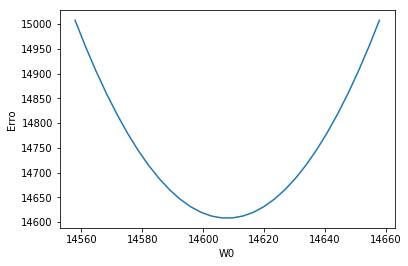

In [128]:
from mpl_toolkits import mplot3d
import matplotlib.pylab as plt

w0 = np.linspace(erro - 50, erro + 50, 30) #definir intervalo razoavel para 0.1888 que é o erro medio retornado
w1 = np.linspace(-1, 1, 30) 

ax = plt.axes()
W0, W1 = np.meshgrid(w0, w1)
Erro = z_function(W0, X, y)

plt.ylabel("Erro")
plt.xlabel("W0")
i=8

#plotando sob o eixo x o range nas proximidades do intercept_
plt.plot(W0[i,:], Erro[i,:])
plt.show()


Observamos que o mínimo da parábola é onde o valor do erro médio quadratico foi obtido, o menor possível para esta predição. 
Quaisquer valores que variem disso aumentarão o erro.